<a href="https://colab.research.google.com/github/yuree89/practice/blob/main/23_01_10_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 조별활동 (23.01.10)

In [25]:
# 함수 불러오기

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #train set / test set 나눠서 작동
from sklearn.model_selection import cross_val_score # cross_val_score : 교차검증 함수
from sklearn.neighbors import KNeighborsRegressor # KNeighborsRegressor : 최근접 이웃 회귀

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE

In [27]:
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [29]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [30]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("/content/drive/MyDrive/Ubion/월세.csv", encoding = "cp949")
df

,이름,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
0,Train_0000,Apartment,3,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Train_0001,Independent Floor,1,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Train_0002,Independent Floor,3,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Train_0003,Independent Floor,3,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Train_0004,Apartment,4,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...,...
8687,Train_8687,Apartment,1,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Train_8688,Apartment,1,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Train_8689,Independent Floor,3,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Train_8690,Independent Floor,1,0.248603,20.628700,9.801128,5.679541,41.90,184


In [32]:
df1 = df.drop(["이름"], axis = 1)
df = df1

In [33]:
df

,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
0,Apartment,3,0.312579,22.646032,11.726966,7.352495,83.61,307
1,Independent Floor,1,2.486167,13.500583,7.527761,15.877066,83.61,110
2,Independent Floor,3,1.528794,18.918243,17.135939,10.315737,78.97,369
3,Independent Floor,3,0.967121,17.749252,16.251937,9.797817,162.58,676
4,Apartment,4,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...
8687,Apartment,1,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,Apartment,1,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,Independent Floor,3,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,Independent Floor,1,0.248603,20.628700,9.801128,5.679541,41.90,184


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   집 종류    8692 non-null   object 
 1   방 개수    8692 non-null   int64  
 2   지하철 거리  8692 non-null   float64
 3   공항 거리   8692 non-null   float64
 4   병원 거리   8692 non-null   float64
 5   기차 거리   8692 non-null   float64
 6   면적      8692 non-null   float64
 7   월세 달러   8692 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 543.4+ KB


In [35]:
df.isnull().sum()

집 종류      0
방 개수      0
지하철 거리    0
공항 거리     0
병원 거리     0
기차 거리     0
면적        0
월세 달러     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


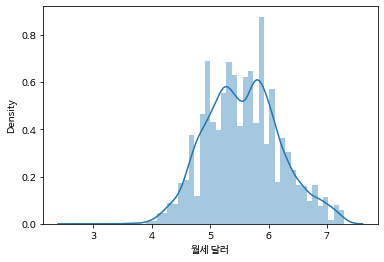

In [36]:
import seaborn as sns
import numpy as np

df["월세 달러"]= np.log1p(df["월세 달러"])
sns.distplot(df["월세 달러"])

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fae937f2940>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fae937aadf0>, <matplotlib.lines.Line2D object at 0x7fae9377a190>], 'caps': [<matplotlib.lines.Line2D object at 0x7fae9377a4f0>, <matplotlib.lines.Line2D object at 0x7fae9377a850>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fae937aaa90>], 'medians': [<matplotlib.lines.Line2D object at 0x7fae9377abb0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fae9377aeb0>], 'means': []})

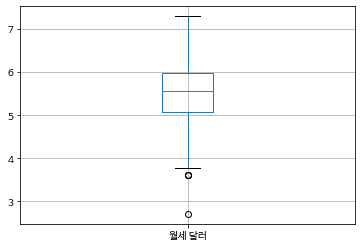

In [37]:
df.boxplot(column = "월세 달러", return_type="both")

In [38]:
q1 = df["월세 달러"].quantile(q=0.25)
q3 = df["월세 달러"].quantile(q=0.75)
IQR = q3-q1
IQR

0.9011770940641073

In [39]:
data_IQR = df[(df["월세 달러"]< q3 + IQR * 1.5) & (df["월세 달러"]> q1 - IQR*1.5)]
data_IQR

,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
0,Apartment,3,0.312579,22.646032,11.726966,7.352495,83.61,5.730100
1,Independent Floor,1,2.486167,13.500583,7.527761,15.877066,83.61,4.709530
2,Independent Floor,3,1.528794,18.918243,17.135939,10.315737,78.97,5.913503
3,Independent Floor,3,0.967121,17.749252,16.251937,9.797817,162.58,6.517671
4,Apartment,4,0.834506,4.288189,15.541840,18.179806,218.32,6.037871
...,...,...,...,...,...,...,...,...
8687,Apartment,1,0.005681,7.776390,18.212199,19.535831,46.45,5.075174
8688,Apartment,1,0.007987,12.969368,9.442664,5.039023,81.29,5.153292
8689,Independent Floor,3,0.203502,17.094466,5.468956,11.109941,148.64,6.605298
8690,Independent Floor,1,0.248603,20.628700,9.801128,5.679541,41.90,5.220356


<ipython-input-40-d7752a523f0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_IQR["월세 달러"]= np.log1p(data_IQR["월세 달러"])
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

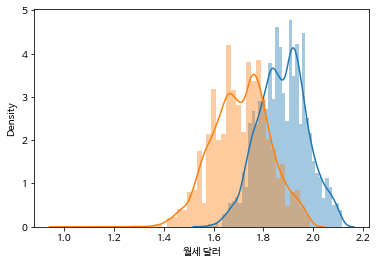

In [40]:
data_IQR["월세 달러"]= np.log1p(data_IQR["월세 달러"])
sns.distplot(data_IQR["월세 달러"])

df["월세 달러"]= np.log(df["월세 달러"])
sns.distplot(df["월세 달러"]) 
#주황색 : IQR 적용 전 월세 / 파랑색 : IQR 적용 후 월세

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num=["지하철 거리","공항 거리","병원 거리","기차 거리","면적"]
cg=["집 종류","방 개수"]

X = df[num+cg]
Y = df["월세 달러"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train,Y_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

[-0.35173434  1.40638919 -0.39062455 -0.55836528  0.6221927   1.
  0.          0.          0.          0.          0.          1.
  0.          0.          0.          0.        ]


#선형 회귀

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression().fit(X_train, Y_train) #선형회귀

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

predict value
 [1.65773264 1.68609162 1.82410788 ... 1.77530844 1.81641215 1.60312507]
train R2 : 0.703
test R2 : -0.164
RMSE: 0.125


In [43]:
print("절편", np.round(lr.intercept_, 3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 1.664
가중치(beta) [ 0.002 -0.013 -0.016 -0.024  0.064  0.017  0.02   0.003 -0.04  -0.029
  0.034  0.072  0.059 -0.025  0.204 -0.315]


#K-NN (K-최근접 이웃)

In [44]:
import numpy as np

num=["지하철 거리","공항 거리","병원 거리","기차 거리","면적"]
cg=["집 종류","방 개수"]

X = df[num+cg]
Y = df["월세 달러"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

ct = ColumnTransformer([('scling', StandardScaler(), num), ('onehot', OneHotEncoder(sparse = False), cg)])
ct.fit(X_train,Y_train)
X_test = ct.transform(X_test)
X_train = ct.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 9, p=2)
#p : int, default=2
#power parameter for the minkowski metric. when p =1
#this is equivalent to using manhattan_distance(l1), and euclidean_distance(l2) for p=2, For arbitary p,minkowski distance
# 1은 맨하탄 2는 유클리디안 

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE {:.3f}".format(rmse))

accuracy: 0.839
RMSE 0.052


아래 그래프로 양의 상관관계 확인

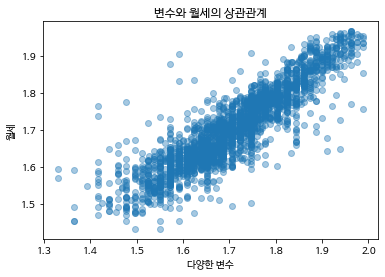

In [45]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred, alpha=0.4)
plt.xlabel("다양한 변수")
plt.ylabel("월세")
plt.title("변수와 월세의 상관관계")
plt.show()

#의사결정나무 (회귀)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

num = ['지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적']
cg = ['방 개수','집 종류']

X = df[num+cg]
Y = df["월세 달러"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

#표준화,원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(),num),('onehot',OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

#numeric values(Y)
DT_model_reg = DecisionTreeRegressor(random_state = 0, max_depth = 5) #depth 가장 적절히 찾아서 분류
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("rmse : {:.3f}".format(rmse))

accuracy : 0.759
rmse : 0.058


아래 내용으로 면적이 월세 달러와 가장 큰 상관관계 있음을 알 수 있다.

In [47]:
feature_name = ['지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적', '방 개수1', '방 개수2','방 개수3','방 개수4', '방 개수5', '방 개수6', '방 개수8', '집 종류1','집 종류2','집 종류3','집 종류4']
#방개수 1,2,3,4,5,6,8  / 집 종류 4가지 여서 데이터 각각 넣음
feature_importance = DT_model_reg.feature_importances_  #어느 모델에 넣어도 나옴(회귀 빼고)
sorted(zip(feature_importance, feature_name), reverse = True)  #변수의 중요도/ 높을수록 중요(0은 상관없다는 뜻)

[(0.8438470651318679, '면적'),
 (0.05206388789524567, '병원 거리'),
 (0.04895829552509566, '기차 거리'),
 (0.03907965464909748, '공항 거리'),
 (0.01057880765473734, '방 개수1'),
 (0.0029645413993780053, '방 개수3'),
 (0.0015550042087645849, '지하철 거리'),
 (0.0008739206775914055, '방 개수2'),
 (7.882285822195872e-05, '집 종류3'),
 (0.0, '집 종류4'),
 (0.0, '집 종류2'),
 (0.0, '집 종류1'),
 (0.0, '방 개수8'),
 (0.0, '방 개수6'),
 (0.0, '방 개수5'),
 (0.0, '방 개수4')]

#의사결정나무 그래프 확인

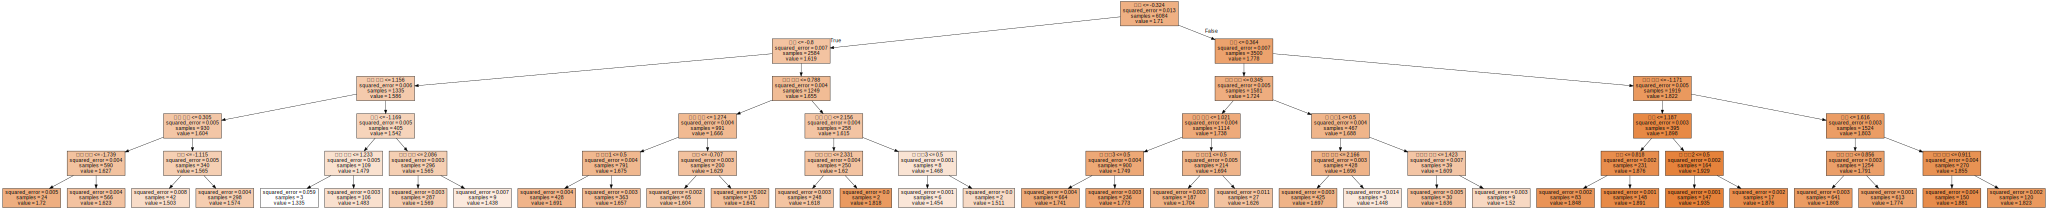

In [48]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg, out_file = "tree.dot", feature_names = feature_name, impurity = True, filled = True)

#파일열기
with open("tree.dot", encoding = "utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)